In [1]:
from joblib import dump,load
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import shap

bdt_model = load(r'BDT_model_11prams_32trees_2depth_XGBoost_1.joblib')
#bdt_model = load(r'C:\Users\oscar\OneDrive\Documents\Year4_Project\BDT_model(99prams)_1000_trees_6_depth.joblib')
#bdt_model = load(r'BDT_model_1000trees_4_XGBoost.joblib')
#bdt_model = load(r'C:\Users\oscar\OneDrive\Documents\Year4_Project\BDT_model(11prams)_1000_trees_6_depth.joblib')

In [2]:

#Train_Data = pd.read_csv(r'\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\Combined_Dataset.csv')
Test_Data = pd.read_csv(r"C:\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\Above_16GeV_Test_DATA.csv")
#Test_Data = pd.read_csv(r"C:\Users\oscar\OneDrive\Documents\Year4_Project\test_data.csv")
#Test_Data = pd.read_csv(r'\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\New_prams_1.csv')
cells_99 = Test_Data.drop(['TOB_ET', "label",'offline_ele_pt','ID','TOB_eta'],axis=1)
#print(len(cells_99))
print(len(Test_Data))
labels = Test_Data["label"].tolist()  
cells_99.head()

20000


,L0_1,L0_2,L0_3,L0_4,L0_5,L0_6,L0_7,L0_8,L0_9,L1_1,...,L3_9,Had_1,Had_2,Had_3,Had_4,Had_5,Had_6,Had_7,Had_8,Had_9
0,0.0,0.0,0.0,0.0,2.050,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.950,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.275,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
### new prams L0_5 
Test_Data['L0_centre_sum'] = Test_Data['L0_5']
#Test_Data['L0_peripheral_sum'] = Test_Data['L0_2'] + Test_Data['L0_4'] + Test_Data['L0_6'] + Test_Data['L0_8']
Test_Data['L1_centre_sum'] = Test_Data['L1_18'] + Test_Data['L1_19'] 
Test_Data['L1_wide_centre_sum'] = Test_Data['L1_17'] + + Test_Data['L1_20'] 
Test_Data['L1_wider_centre_sum'] = Test_Data['L1_16'] + + Test_Data['L1_15'] + Test_Data['L1_21'] + Test_Data['L1_22']
Test_Data['L2_centre_sum'] = Test_Data['L2_18'] + Test_Data['L2_19'] 
Test_Data['L2_wide_centre_sum'] = Test_Data['L2_17'] + Test_Data['L2_20']
Test_Data['L2_spread_sum'] = Test_Data['L2_16'] + Test_Data['L2_21'] 
Test_Data['L2_vertical_sum'] = Test_Data['L2_30'] + Test_Data['L2_31'] + Test_Data['L2_32'] + Test_Data['L2_29'] + Test_Data['L2_5'] + Test_Data['L2_6'] + Test_Data['L2_7'] + Test_Data['L2_8'] 
#Test_Data['L2_spread_sum'] = Test_Data['L2_21'] + Test_Data['L2_16']
# Test_Data['L3_peripheral_sum'] = Test_Data['L3_2'] + Test_Data['L3_4'] + Test_Data['L3_6'] + Test_Data['L3_8']
### new prams L3_5
Test_Data['L3_centre_sum'] = Test_Data['L3_5']
### new prams Had_5
Test_Data['Had_centre_sum'] = Test_Data['Had_5']
#Test_Data['Had_Vertical'] = Test_Data['Had_2'] + Test_Data['Had_8']
#Test_Data['Had_Horizontal'] = Test_Data['Had_4'] + Test_Data['Had_6']
Test_Data['Had_peripheral_sum'] = Test_Data['Had_2'] + Test_Data['Had_4'] + Test_Data['Had_6'] + Test_Data['Had_8']
Test_Data['Had_out_sum'] = Test_Data['Had_1'] + Test_Data['Had_3'] + Test_Data['Had_7'] + Test_Data['Had_9']

#test with more L2 data 
#Test_Data['rest_of_L2']= Test_Data['L2_1'] + Test_Data['L2_2'] + Test_Data['L2_3'] + Test_Data['L2_4'] + Test_Data['L2_5'] + Test_Data['L2_6'] + Test_Data['L2_7'] + Test_Data['L2_8'] + Test_Data['L2_9'] + Test_Data['L2_10'] + Test_Data['L2_11'] + Test_Data['L2_12'] + Test_Data['L2_13'] + Test_Data['L2_14'] + Test_Data['L2_15'] + Test_Data['L2_22'] + Test_Data['L2_23'] + Test_Data['L2_24'] + Test_Data['L2_25'] + Test_Data['L2_26'] + Test_Data['L2_27'] + Test_Data['L2_28'] + Test_Data['L2_29'] + Test_Data['L2_30'] + Test_Data['L2_31'] + Test_Data['L2_32'] + Test_Data['L2_33'] + Test_Data['L2_34'] + Test_Data['L2_35'] + Test_Data['L2_36']
Test_Data.head()
columns_to_keep = ['L1_centre_sum', 'L1_wide_centre_sum', 'L1_wider_centre_sum','L2_centre_sum', 'L2_wide_centre_sum', 'L2_spread_sum', 'L2_vertical_sum', 'L3_centre_sum', 'Had_centre_sum', 'Had_peripheral_sum', 'Had_out_sum']
#columns_to_keep = [ 'L0_centre_sum',	'L1_centre_sum',	'L1_wide_centre_sum',	'L2_centre_sum',	'L2_wide_centre_sum', 'L2_spread_sum',	'L2_vertical_sum',	'L3_centre_sum',	'Had_centre_sum',	'Had_peripheral_sum',	'Had_out_sum', 'TOB_eta']
#columns_to_keep = [ 'Had_2', 'Had_5', 'L0_5', 'L1_17', 'L1_18', 'L1_19', 'L1_20', 'L2_17', 'L2_18', 'L2_19', 'L2_20']#columns_to_keep = ['L0_centre_sum',	'L1_centre_sum',	'L1_wide_centre_sum',	'L2_centre_sum',	'L2_spread_sum',	'L2_vertical_sum',	'L3_centre_sum',	'Had_centre_sum',	'Had_peripheral_sum',	'Had_out_sum']

#columns_to_keep = ['L0_peripheral_sum',	'L1_centre_sum',	'L2_wide_centre_sum',	'L0_centre_sum',	'L3_peripheral_sum',	'L3_centre_sum',	'Had_centre_sum',	'Had_peripheral_sum',	'L2_spread_sum']
New_prams= Test_Data[columns_to_keep]

New_prams.head()

,L1_centre_sum,L1_wide_centre_sum,L1_wider_centre_sum,L2_centre_sum,L2_wide_centre_sum,L2_spread_sum,L2_vertical_sum,L3_centre_sum,Had_centre_sum,Had_peripheral_sum,Had_out_sum
0,0.000,13.80,1.0,0.850,18.400,5.45,0.000,0.425,0.0,0.0,0.0
1,1.025,11.35,0.0,3.050,16.350,0.90,2.675,0.000,0.0,0.0,0.0
2,0.750,8.60,0.0,3.425,13.750,0.80,0.000,0.000,0.0,0.0,0.0
3,2.075,5.05,0.0,6.900,14.800,0.85,1.925,0.000,0.0,0.0,0.0
4,6.500,0.40,0.0,12.625,1.375,0.00,0.875,0.000,0.0,0.0,0.0


In [4]:
prams = New_prams # or cells 99 if you want to comapre with a 99 cell model

bdt_predictions = bdt_model.predict(prams)




Accuracy: 89.86%


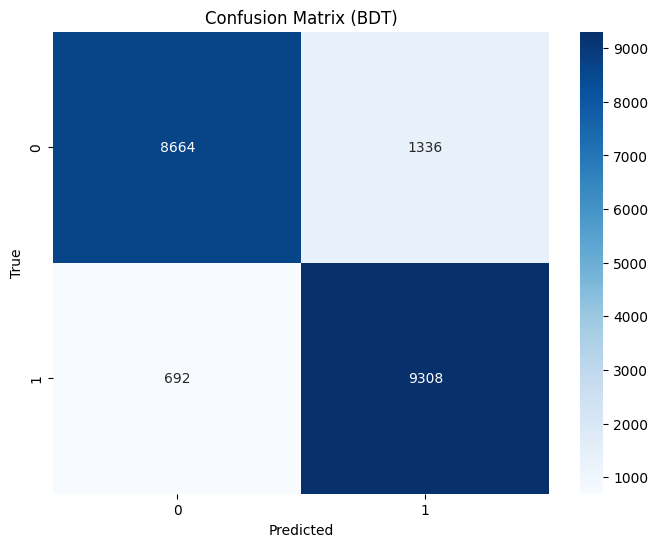

Accuracy: 0.8986
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     10000
           1       0.87      0.93      0.90     10000

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

0.9017632241813602


In [5]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
#
predicted_classes = np.array(bdt_predictions)  # Your QNN model's output probabilities

labels = Test_Data["label"].tolist()  # The true labels from 

# Get the predicted classes (as 0 or 1)

accuracy = accuracy_score(labels, predicted_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (BDT)' )
plt.show()


class_report = classification_report(labels, predicted_classes)

print("Accuracy:", accuracy_score(labels, predicted_classes) )
print("Classification Report:\n", classification_report(labels, predicted_classes))
print(f1_score(labels, predicted_classes))


Accuracy (Old Method): 88.83%


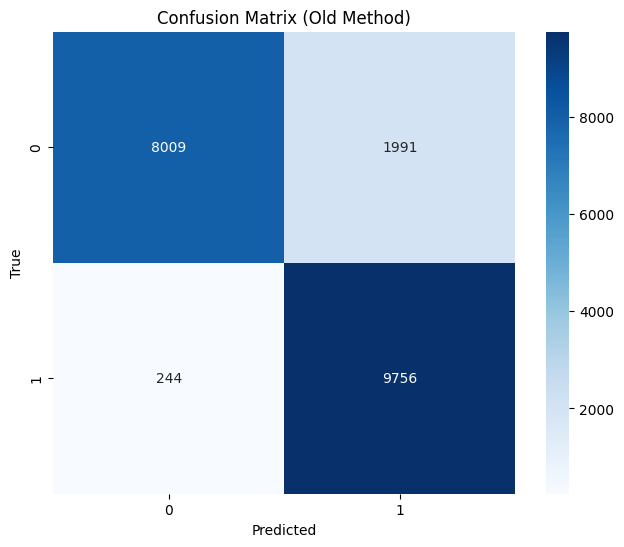

Accuracy: 0.88825
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     10000
           1       0.83      0.98      0.90     10000

    accuracy                           0.89     20000
   macro avg       0.90      0.89      0.89     20000
weighted avg       0.90      0.89      0.89     20000

0.8972272037522415


In [6]:



# 'ID' values for old method predictions to include both 3 and 2 as label 1
old_method_predictions = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)

accuracy_old_method = accuracy_score(labels, old_method_predictions)
print(f'Accuracy (Old Method): {accuracy_old_method * 100:.2f}%')

conf_matrix_old_method = confusion_matrix(labels, old_method_predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_old_method, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Old Method)')
plt.show()


class_report_old_method = classification_report(labels, old_method_predictions, zero_division=0)
print("Accuracy:", accuracy_score(labels, old_method_predictions) )
print("Classification Report:\n", classification_report(labels, old_method_predictions))
print(f1_score(labels, old_method_predictions))


In [7]:


predictions = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)

actual_labels = Test_Data['label']


accuracy = accuracy_score(actual_labels, predictions)

label_1_indices = actual_labels == 1
label_0_indices = actual_labels == 0


accuracy_label_1 = (predictions[label_1_indices] == actual_labels[label_1_indices]).mean()


accuracy_label_0 = (predictions[label_0_indices] == actual_labels[label_0_indices]).mean()

print(f'Accuracy for label 1: {accuracy_label_1:.2%}')
print(f'Accuracy for label 0: {accuracy_label_0:.2%}')
print(f'Overall accuracy: {accuracy:.2%}')

Accuracy for label 1: 97.56%
Accuracy for label 0: 80.09%
Overall accuracy: 88.83%


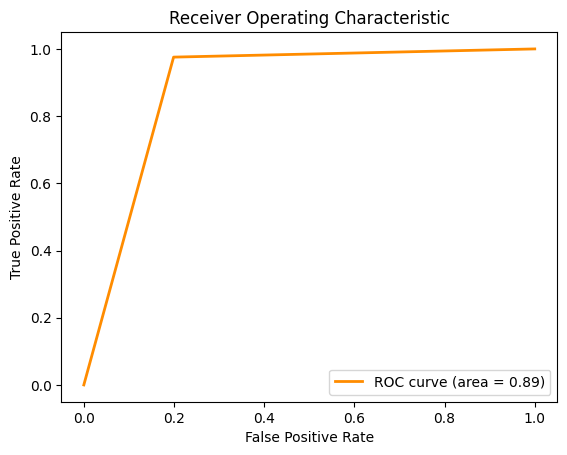

In [8]:
from sklearn.metrics import roc_curve, auc, accuracy_score
actual_labels = Test_Data['label']
Test_Data['predictions'] = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)
fpr, tpr, _ = roc_curve(actual_labels, Test_Data['predictions']) 
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

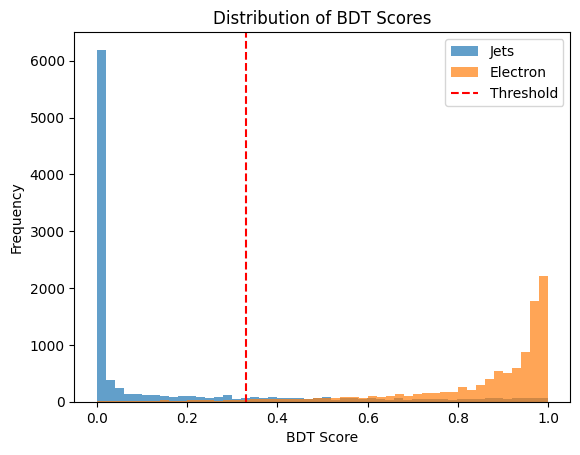

In [9]:

bdt_predictions_proba = bdt_model.predict_proba(prams)

# Assuming the positive class (label 1) is 'Electron' and the negative class (label 0) is 'JET'
electron_scores = bdt_predictions_proba[actual_labels == 1, 1]  # Probability for being an electron
muon_scores = bdt_predictions_proba[actual_labels == 0, 1]      # Probability for being a JET (it is labbled muon)

# Plotting the distribution of scores
plt.hist(muon_scores, bins=50, alpha=0.7, label='Jets')
plt.hist(electron_scores, bins=50, alpha=0.7, label='Electron')
plt.axvline(0.33, color='red', linestyle='--', label='Threshold')

plt.xlabel('BDT Score')
plt.ylabel('Frequency')
plt.title('Distribution of BDT Scores')
plt.legend(loc='upper right')

plt.show()




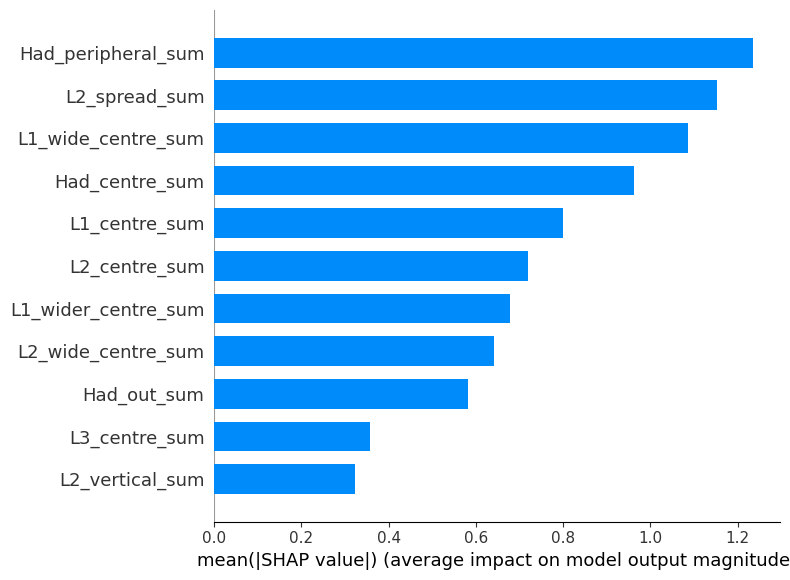

In [10]:


explainer = shap.TreeExplainer(bdt_model)
shap_values = explainer.shap_values(prams)  

shap.summary_plot(shap_values, prams, plot_type='bar')


In [11]:
# Load the model and predict the probabilities
bdt_scores = bdt_model.predict_proba(prams)[:, 1] 

# Initialize the best threshold and its accuracy
best_threshold = None
best_accuracy = 0

# Test thresholds between 0 and 1 in increments of 0.01
for threshold in np.arange(0, 1.01, 0.01):
    predictions = np.where(bdt_scores > threshold, 1, 0)
    accuracy = accuracy_score(actual_labels, predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold


print(f'Best threshold: {best_threshold}')
print(f'Best overall accuracy: {best_accuracy:.2%}')


Best threshold: 0.52
Best overall accuracy: 89.94%


In [12]:



new_threshold = 0.52
predictions = np.where(bdt_scores > new_threshold, 1, 0)  # 1 for electron, 0 for jet



overall_accuracy = accuracy_score(actual_labels, predictions)


electron_indices = (actual_labels == 1)
accuracy_electrons = accuracy_score(actual_labels[electron_indices], predictions[electron_indices]).mean()


muon_indices = (actual_labels == 0)
accuracy_muons = accuracy_score(actual_labels[muon_indices], predictions[muon_indices]).mean()

print(f'Overall accuracy: {overall_accuracy:.2%}')
print(f'Accuracy for electrons (label 1): {accuracy_electrons:.2%}')
print(f'Accuracy for muons (label 0): {accuracy_muons:.2%}')


Overall accuracy: 89.94%
Accuracy for electrons (label 1): 92.39%
Accuracy for muons (label 0): 87.48%


In [13]:
from sklearn.metrics import accuracy_score


actual_labels = Test_Data['label']
predictions = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)

overall_accuracy_old_model = accuracy_score(actual_labels, predictions)


label_1_indices = actual_labels == 1
accuracy_label_1_old_model = accuracy_score(actual_labels[label_1_indices], predictions[label_1_indices])


label_0_indices = actual_labels == 0
accuracy_label_0_old_model = accuracy_score(actual_labels[label_0_indices], predictions[label_0_indices])

print(f'Current Model - Overall accuracy: {overall_accuracy_old_model:.2%}')
print(f'Current Model - Accuracy for label 1: {accuracy_label_1_old_model:.2%}')
print(f'Current Model - Accuracy for label 0: {accuracy_label_0_old_model:.2%}')


Current Model - Overall accuracy: 88.83%
Current Model - Accuracy for label 1: 97.56%
Current Model - Accuracy for label 0: 80.09%


In [14]:

new_threshold = 0.295
predictions_bdt = np.where(bdt_scores > new_threshold, 1, 0)


overall_accuracy_bdt = accuracy_score(actual_labels, predictions_bdt)


accuracy_electrons_bdt = accuracy_score(actual_labels[label_1_indices], predictions_bdt[label_1_indices])


accuracy_muons_bdt = accuracy_score(actual_labels[label_0_indices], predictions_bdt[label_0_indices])

print(f'BDT Model - Overall accuracy: {overall_accuracy_bdt:.2%}')
print(f'BDT Model - Accuracy for electrons (label 1): {accuracy_electrons_bdt:.2%}')
print(f'BDT Model - Accuracy for Jets Make sure to match with current model (label 0): {accuracy_muons_bdt:.2%}')


BDT Model - Overall accuracy: 88.83%
BDT Model - Accuracy for electrons (label 1): 97.58%
BDT Model - Accuracy for Jets Make sure to match with current model (label 0): 80.09%


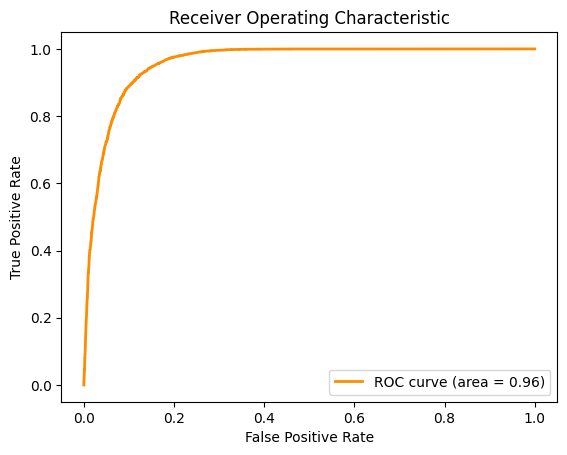

In [15]:
from sklearn.metrics import roc_curve, auc, accuracy_score
actual_labels = Test_Data['label']
Test_Data['predictions'] = np.where(bdt_scores > new_threshold, 1, 0)  
fpr, tpr, _ = roc_curve(actual_labels, bdt_scores) 
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [16]:
Test_Data['predictions'] = np.where(bdt_scores > new_threshold, 1, 0)  # 1 for electron, 0 for muon

# Apply the best threshold to decide the predicted cl

# Create energy bins
Test_Data['energy_bin'] = pd.cut(Test_Data['TOB_ET'], bins=np.arange(0, 72, 2), right=False)

# Initialize a dictionary to store accuracy for each energy bin
accuracy_per_energy_bin = {}


# Group the data by energy bins and calculate accuracy for each bin
for energy_bin, group in Test_Data.groupby('energy_bin'):
    if not group.empty:
        bin_accuracy = accuracy_score(group['label'], group['predictions'])
        accuracy_per_energy_bin[energy_bin] = bin_accuracy

# Convert the dictionary to a DataFrame for plotting
accuracy_df = pd.DataFrame(list(accuracy_per_energy_bin.items()), columns=['Energy Bin', 'Accuracy'])




The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [17]:
Test_Data['predictions'] = np.where(bdt_scores > new_threshold, 1, 0)


Test_Data['energy_bin'] = pd.cut(Test_Data['offline_ele_pt'], bins=np.arange(0, 60, 3), right=False)

# Initialize a dictionary to store accuracy for label 1 in each energy bin
accuracy_for_label_1_per_bin_bdt = {}


grouped = Test_Data.groupby('energy_bin')


for energy_bin, group in grouped:
    # Filter for label 1
    group_label_1 = group[group['label'] == 1]
    if not group_label_1.empty:
        
        bin_accuracy_label_1 = accuracy_score(group_label_1['label'], group_label_1['predictions'])
        accuracy_for_label_1_per_bin_bdt[energy_bin] = bin_accuracy_label_1

# Convert the dictionary to a DataFrame for plotting
accuracy_for_label_1_df = pd.DataFrame(list(accuracy_for_label_1_per_bin_bdt.items()), columns=['Energy Bin', 'Accuracy for Label 1'])





The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [18]:
Test_Data['predictions'] = np.where(bdt_scores > new_threshold, 1, 0)

Test_Data['energy_bin'] = pd.cut(Test_Data['TOB_ET'], bins=np.arange(0, 62, 2), right=False)

accuracy_for_label_0_per_bin = {}

grouped = Test_Data.groupby('energy_bin')


for energy_bin, group in grouped:
    
    group_label_0 = group[group['label'] == 0]
    if not group_label_0.empty:
        
        bin_accuracy_label_0 = accuracy_score(group_label_0['label'], group_label_0['predictions'])
        accuracy_for_label_0_per_bin[energy_bin] = bin_accuracy_label_0


accuracy_for_label_0_df_BDT = pd.DataFrame(list(accuracy_for_label_0_per_bin.items()), columns=['Energy Bin', 'Accuracy for Label 0'])



The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [19]:

#function to make the errror
def binomial_confidence_interval(successes, total):
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt((proportion * (1 - proportion)) / total)
    return error


Test_Data['predictions'] = np.where(bdt_scores > new_threshold, 1, 0)


Test_Data['energy_bin'] = pd.cut(Test_Data['offline_ele_pt'], bins=np.arange(0, 60, 3), right=False)


accuracy_for_label_1_per_bin_bdt_with_error = {}


grouped = Test_Data.groupby('energy_bin')

# Calculate accuracy for label 1 within each bin and its error
for energy_bin, group in grouped:
    group_label_1 = group[group['label'] == 1]
    if not group_label_1.empty:
        total = len(group_label_1)
        successes = group_label_1['predictions'].sum()
        bin_accuracy_label_1 = accuracy_score(group_label_1['label'], group_label_1['predictions'])
        bin_error = binomial_confidence_interval(successes, total)
        accuracy_for_label_1_per_bin_bdt_with_error[energy_bin] = (bin_accuracy_label_1, bin_error)

# Convert the dictionary to a DataFrame for plotting
accuracy_for_label_1_df_bdt= pd.DataFrame([(bin.mid, acc, err) for bin, (acc, err) in accuracy_for_label_1_per_bin_bdt_with_error.items()], columns=['Energy Bin', 'Accuracy for Label 1', 'Error'])



The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [20]:
# Filter the DataFrame for the 60-62 GeV energy bin
bin_60_62_data = Test_Data[(Test_Data['offline_ele_pt'] >=53 ) & (Test_Data['offline_ele_pt'] < 56)]

# Check for multiple individual events/predictions
num_events = len(bin_60_62_data)
print(f"Number of individual events in the 60-62 GeV energy bin: {num_events}")


if num_events > 1:
    
    prediction_variability = bin_60_62_data['predictions'].std()
    print(f"Variability (standard deviation) in predictions for the 60-62 GeV energy bin: {prediction_variability}")
else:
    print("Not enough individual events to calculate variability.")


#for binomal error you can have 0 error bar when accuracy is 100%


Number of individual events in the 60-62 GeV energy bin: 27
Variability (standard deviation) in predictions for the 60-62 GeV energy bin: 0.0


In [21]:


# Function to calculate the error for a binomial distribution
def binomial_confidence_interval(successes, total):
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt((proportion * (1 - proportion)) / total)
    return error

Test_Data['predictions1'] = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)



Test_Data['energy_bin'] = pd.cut(Test_Data['offline_ele_pt'], bins=np.arange(0, 60, 3), right=False)

accuracy_for_label_1_per_bin_bdt_with_error = {}


grouped = Test_Data.groupby('energy_bin')

for energy_bin, group in grouped:
    group_label_1 = group[group['label'] == 1]
    if not group_label_1.empty:
        total = len(group_label_1)
        successes = group_label_1['predictions'].sum()
        bin_accuracy_label_1 = accuracy_score(group_label_1['label'], group_label_1['predictions'])
        bin_error = binomial_confidence_interval(successes, total)
        accuracy_for_label_1_per_bin_bdt_with_error[energy_bin] = (bin_accuracy_label_1, bin_error)


accuracy_for_label_0_df_bdt= pd.DataFrame([(bin.mid, acc, err) for bin, (acc, err) in accuracy_for_label_1_per_bin_bdt_with_error.items()], columns=['Energy Bin', 'Accuracy for Label 1', 'Error'])





The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


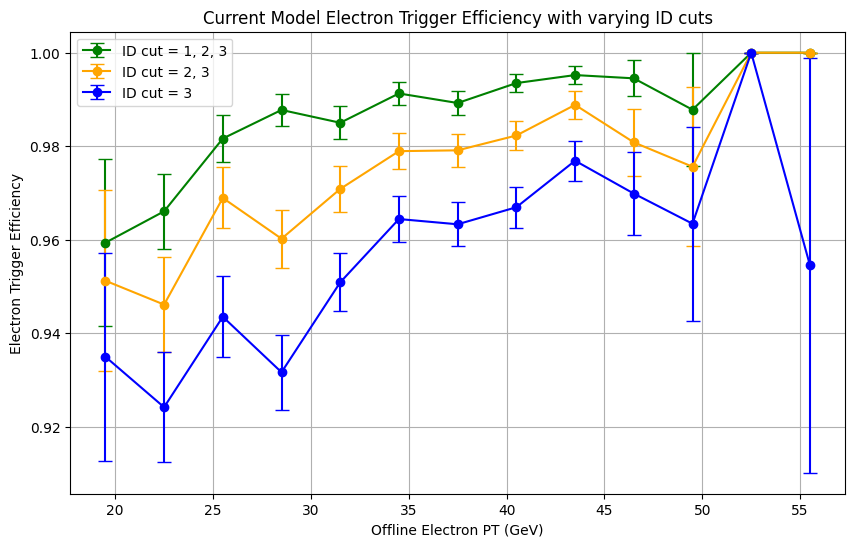

In [22]:



def binomial_confidence_interval(successes, total):
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt((proportion * (1 - proportion)) / total)
    return error

# Generate predictions based on the 'ID' column
Test_Data['predictions'] = Test_Data['ID'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
Test_Data['predictions1'] = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)
Test_Data['predictions2'] = Test_Data['ID'].apply(lambda x: 1 if x in  [3] else 0)

# Bin the 'offline_ele_pt' column into ranges of 3 from 0 to 60
Test_Data['energy_bin'] = pd.cut(Test_Data['offline_ele_pt'], bins=np.arange(0, 60, 3), right=False)

# Initialize dictionaries to store accuracy and error for label 1 in each bin
accuracy_for_label_1_per_bin_old_with_error = {}
accuracy_for_label_1_per_bin_old_with_error_1 = {}
accuracy_for_label_1_per_bin_old_with_error_2 = {}

# Group the data by these energy bins
grouped = Test_Data.groupby('energy_bin')

# Calculate accuracy and error for each bin for all three sets of predictions
for bin_range, group in grouped:
    for predictions_col, accuracy_dict in zip(['predictions', 'predictions1', 'predictions2'], 
                                               [accuracy_for_label_1_per_bin_old_with_error, 
                                                accuracy_for_label_1_per_bin_old_with_error_1, 
                                                accuracy_for_label_1_per_bin_old_with_error_2]):
        label_1_group = group[group['label'] == 1]
        total = len(label_1_group)
        successes = label_1_group[predictions_col].sum()
        if total > 0:
            bin_accuracy_label_1 = accuracy_score(label_1_group['label'], label_1_group[predictions_col])
            bin_error = binomial_confidence_interval(successes, total)
            accuracy_dict[bin_range] = (bin_accuracy_label_1, bin_error)

# Convert the dictionaries to DataFrames for easier visualization
data_frames = []
for accuracy_dict in [accuracy_for_label_1_per_bin_old_with_error, 
                      accuracy_for_label_1_per_bin_old_with_error_1, 
                      accuracy_for_label_1_per_bin_old_with_error_2]:
    df = pd.DataFrame(
        [(bin.mid, acc, err) for bin, (acc, err) in accuracy_dict.items()],
        columns=['Energy Bin Midpoint', 'Accuracy for Label 1', 'Error']
    )
    data_frames.append(df)

# Plotting with error bars
plt.figure(figsize=(10, 6))
colors = ['green','orange', 'blue']
labels = ['ID cut = 1, 2, 3', 'ID cut = 2, 3', 'ID cut = 3']
for df, color, label in zip(data_frames, colors, labels):
    plt.errorbar(
        df['Energy Bin Midpoint'],
        df['Accuracy for Label 1'],
        yerr=df['Error'],
        fmt='-o',
        capsize=5,  # This controls the size of the error bar caps
        label=label,
        color=color
    )

plt.xlabel('Offline Electron PT (GeV)')
plt.ylabel('Electron Trigger Efficiency')
plt.title('Current Model Electron Trigger Efficiency with varying ID cuts')
plt.grid(True)
plt.legend()
plt.show()


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


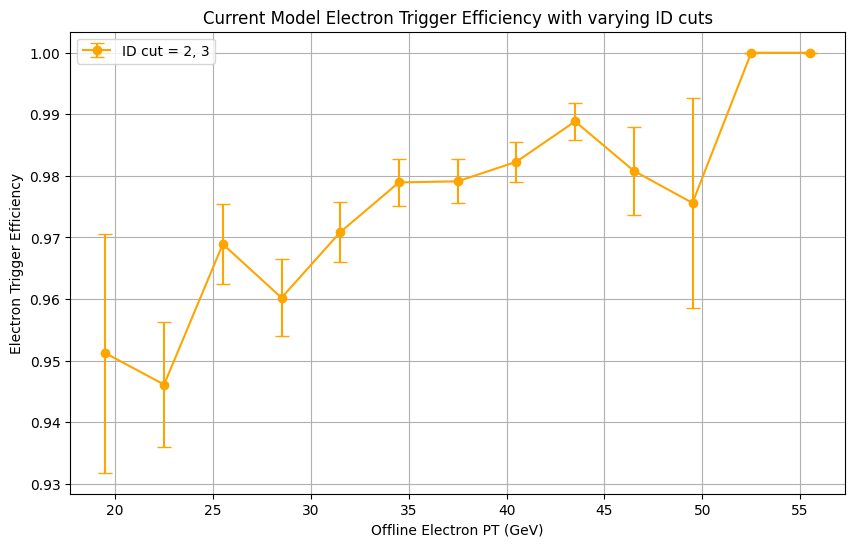

In [23]:


def binomial_confidence_interval(successes, total):
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt((proportion * (1 - proportion)) / total)
    return error
    


Test_Data['predictions1'] = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)


Test_Data['energy_bin'] = pd.cut(Test_Data['offline_ele_pt'], bins=np.arange(0, 60, 3), right=False)


accuracy_for_label_1_per_bin_old_with_error = {}
accuracy_for_label_1_per_bin_old_with_error_1 = {}
accuracy_for_label_1_per_bin_old_with_error_2 = {}


grouped = Test_Data.groupby('energy_bin')


for bin_range, group in grouped:
    for predictions_col, accuracy_dict in zip(['predictions1'], 
                                               [
                                                accuracy_for_label_1_per_bin_old_with_error_1, 
                                                ]):
        label_1_group = group[group['label'] == 1]
        total = len(label_1_group)
        successes = label_1_group[predictions_col].sum()
        if total > 0:
            bin_accuracy_label_1 = accuracy_score(label_1_group['label'], label_1_group[predictions_col])
            bin_error = binomial_confidence_interval(successes, total)
            accuracy_dict[bin_range] = (bin_accuracy_label_1, bin_error)


data_frames = []
for accuracy_dict in [accuracy_for_label_1_per_bin_old_with_error_1]:
    df = pd.DataFrame(
        [(bin.mid, acc, err) for bin, (acc, err) in accuracy_dict.items()],
        columns=['Energy Bin Midpoint', 'Accuracy for Label 1', 'Error']
    )
    data_frames.append(df)

plt.figure(figsize=(10, 6))
colors = ['orange']
labels = ['ID cut = 2, 3']
for df, color, label in zip(data_frames, colors, labels):
    plt.errorbar(
        df['Energy Bin Midpoint'],
        df['Accuracy for Label 1'],
        yerr=df['Error'],
        fmt='-o',
        capsize=5,  # This controls the size of the error bar caps
        label=label,
        color=color
    )

plt.xlabel('Offline Electron PT (GeV)')
plt.ylabel('Electron Trigger Efficiency')
plt.title('Current Model Electron Trigger Efficiency with varying ID cuts')
plt.grid(True)
plt.legend()
plt.show()


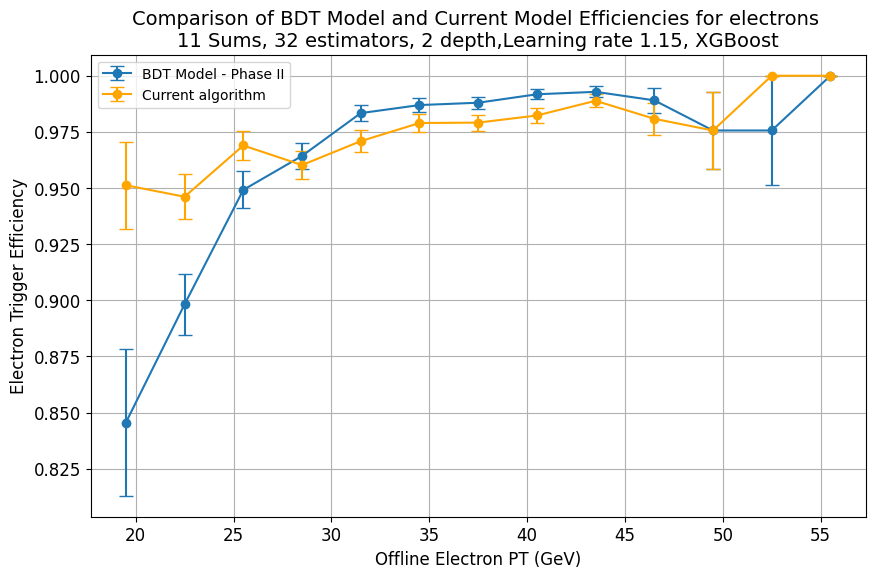

In [24]:

plt.figure(figsize=(10, 6))

# Plot BDT Model Accuracy
plt.errorbar(
    accuracy_for_label_1_df_bdt['Energy Bin'], 
    accuracy_for_label_1_df_bdt['Accuracy for Label 1'], 
    yerr=accuracy_for_label_1_df_bdt['Error'], 
    fmt='-o', 
    capsize=5, 
    label='BDT Model - Phase II'
)
colors = ['orange']
label = 'Current algorithm'
# Plot Old Model Accuracy
plt.errorbar(
        df['Energy Bin Midpoint'],
        df['Accuracy for Label 1'],
        yerr=df['Error'],
        fmt='-o',
        capsize=5,  # This controls the size of the error bar caps
        label=label,
        color=color
    )

plt.xlabel('Offline Electron PT (GeV)' , fontsize=12)
plt.ylabel('Electron Trigger Efficiency' , fontsize=12)
plt.title('Comparison of BDT Model and Current Model Efficiencies for electrons \n'
          '11 Sums, 32 estimators, 2 depth,'
          'Learning rate 1.15, XGBoost' , fontsize=14)

plt.grid(True)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


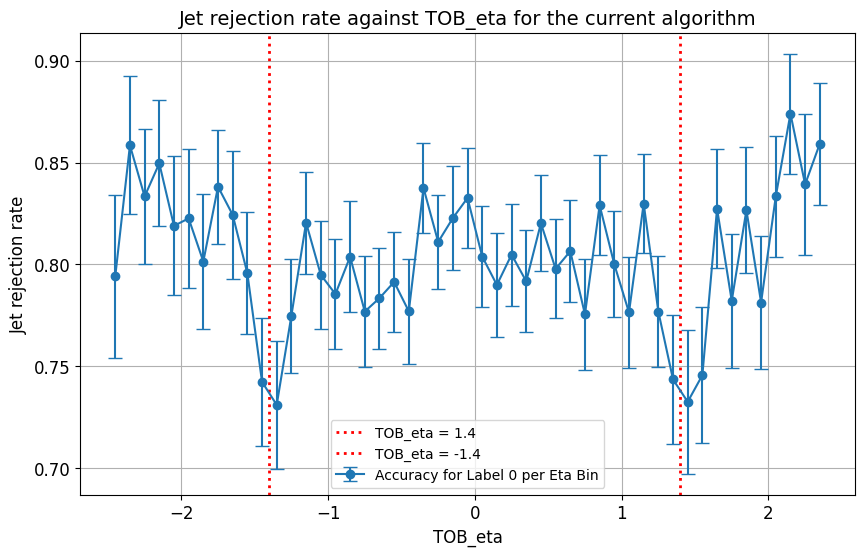

In [25]:


def binomial_error(successes, total):
    # Calculate the standard error for binomial proportion
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt(proportion * (1 - proportion) / total)
    return error

# Assuming Test_Data is your DataFrame
# ... (Your data loading and preparation here) ...

# Generate predictions based on the 'ID' column
Test_Data['predictions'] = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)

# Bin the 'TOB_eta' column into ranges
Test_Data['eta_bin'] = pd.cut(Test_Data['TOB_eta'], bins=np.arange(-2.5, 2.5, 0.1), right=False)

# Initialize lists to store accuracies and errors for label 0 in each eta bin
accuracy_for_label_0_per_bin_eta = {}
errors_per_bin_eta = {}

# Group the data by these eta bins
grouped = Test_Data.groupby('eta_bin')

# Calculate accuracy and error for each bin
for bin_range, group in grouped:
    # Filter for label 0
    label_0_group = group[group['label'] == 0]
    total = len(label_0_group)
    successes = label_0_group['predictions'].sum()
    accuracy = accuracy_score(label_0_group['label'], label_0_group['predictions']) if total > 0 else 0
    error = binomial_error(successes, total)

    accuracy_for_label_0_per_bin_eta[bin_range] = accuracy
    errors_per_bin_eta[bin_range] = error

# Convert the dictionaries to a DataFrame for easier visualization
accuracy_for_label_0_df_eta = pd.DataFrame([
    (bin.mid, accuracy_for_label_0_per_bin_eta[bin], errors_per_bin_eta[bin])
    for bin in accuracy_for_label_0_per_bin_eta
], columns=['Eta Bin Midpoint', 'Accuracy for Label 0', 'Error'])

# Plotting with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(
    accuracy_for_label_0_df_eta['Eta Bin Midpoint'],
    accuracy_for_label_0_df_eta['Accuracy for Label 0'],
    yerr=accuracy_for_label_0_df_eta['Error'],
    capsize=5,
    fmt='-o',
    label='Accuracy for Label 0 per Eta Bin'
)

# Add vertical lines at Eta = ±1.4
plt.axvline(x=1.4, color='red', linestyle='dotted', linewidth=2, label='TOB_eta = 1.4')
plt.axvline(x=-1.4, color='red', linestyle='dotted', linewidth=2, label='TOB_eta = -1.4')

plt.xlabel('TOB_eta', fontsize=12)
plt.ylabel('Jet rejection rate', fontsize=12)
plt.title('Jet rejection rate against TOB_eta for the current algorithm', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)



plt.grid(True)
plt.legend()

plt.show()


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


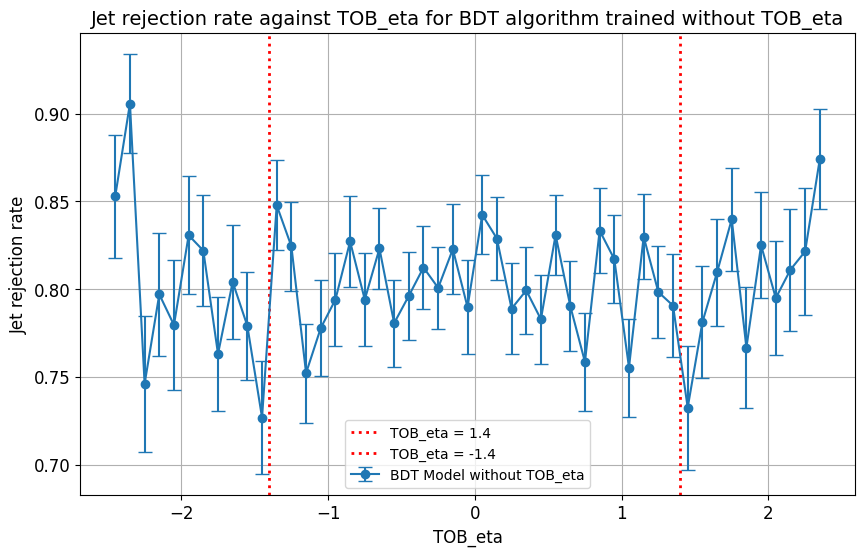

In [26]:


def binomial_error(successes, total):
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt(proportion * (1 - proportion) / total)
    return error


Test_Data['predictions'] = np.where(bdt_scores > new_threshold, 1, 0)

# Bin the 'eta' column into ranges
Test_Data['eta_bin'] = pd.cut(Test_Data['TOB_eta'], bins=np.arange(-2.5, 2.5, 0.1), right=False)

accuracy_for_label_0_per_bin_eta = {}
errors_per_bin_eta = {}


grouped = Test_Data.groupby('eta_bin')


for bin_range, group in grouped:
    label_0_group = group[group['label'] == 0]
    total = len(label_0_group)
    successes = label_0_group['predictions'].sum()
    accuracy = accuracy_score(label_0_group['label'], label_0_group['predictions']) if total > 0 else 0
    error = binomial_error(successes, total)

    accuracy_for_label_0_per_bin_eta[bin_range] = accuracy
    errors_per_bin_eta[bin_range] = error


accuracy_for_label_0_df_eta = pd.DataFrame([
    (bin.mid, accuracy_for_label_0_per_bin_eta[bin], errors_per_bin_eta[bin])
    for bin in accuracy_for_label_0_per_bin_eta
], columns=['Eta Bin Midpoint', 'Accuracy for Label 0', 'Error'])


plt.figure(figsize=(10, 6))
plt.errorbar(
    accuracy_for_label_0_df_eta['Eta Bin Midpoint'],
    accuracy_for_label_0_df_eta['Accuracy for Label 0'],
    yerr=accuracy_for_label_0_df_eta['Error'],
    fmt='-o',
    capsize=5,
    label='BDT Model without TOB_eta'
)


plt.axvline(x=1.4, color='red', linestyle='dotted', linewidth=2, label='TOB_eta = 1.4')
plt.axvline(x=-1.4, color='red', linestyle='dotted', linewidth=2, label='TOB_eta = -1.4')

plt.xlabel('TOB_eta', fontsize=12)
plt.ylabel('Jet rejection rate', fontsize=12)
plt.title('Jet rejection rate against TOB_eta for BDT algorithm trained without TOB_eta', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.legend()
plt.grid(True)
plt.show()


In [27]:




def binomial_confidence_interval(successes, total):
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt((proportion * (1 - proportion)) / total)
    return error


Test_Data['predictions'] = np.where(bdt_scores > new_threshold, 1, 0)


Test_Data['energy_bin'] = pd.cut(Test_Data['TOB_ET'], bins=np.arange(0, 62, 2), right=False)


accuracy_for_label_0_per_bin_with_error = {}

# Group the data by energy bins
grouped = Test_Data.groupby('energy_bin')


for energy_bin, group in grouped:
    group_label_0 = group[group['label'] == 0]
    if not group_label_0.empty:
        total = len(group_label_0)
        successes = (group_label_0['label'] == group_label_0['predictions']).sum()
        bin_accuracy_label_0 = accuracy_score(group_label_0['label'], group_label_0['predictions'])
        bin_error = binomial_confidence_interval(successes, total)
        accuracy_for_label_0_per_bin_with_error[energy_bin] = (bin_accuracy_label_0, bin_error)

# Convert the dictionary to a DataFrame for plotting
accuracy_for_label_0_df_with_error_bdt = pd.DataFrame(
    [(bin.mid, acc, err) for bin, (acc, err) in accuracy_for_label_0_per_bin_with_error.items()],
    columns=['Energy Bin Midpoint', 'Accuracy for Label 0', 'Error'])




The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [28]:


def binomial_confidence_interval(successes, total):
    if total == 0:
        return 0
    proportion = successes / total
    error = np.sqrt((proportion * (1 - proportion)) / total)
    return error

Test_Data['predictions'] = Test_Data['ID'].apply(lambda x: 1 if x in [2, 3] else 0)


Test_Data['energy_bin'] = pd.cut(Test_Data['TOB_ET'], bins=np.arange(0, 62, 2), right=False)


accuracy_for_label_0_per_bin_with_error = {}


grouped = Test_Data.groupby('energy_bin')

for name, group in grouped:
    label_0_group = group[group['label'] == 0]
    if not label_0_group.empty:
        # Calculate accuracy for label 0 in the current bin
        total = len(label_0_group)
        successes = (label_0_group['label'] == label_0_group['predictions']).sum()
        bin_accuracy_label_0 = accuracy_score(label_0_group['label'], label_0_group['predictions'])
        bin_error = binomial_confidence_interval(successes, total)
        accuracy_for_label_0_per_bin_with_error[name] = (bin_accuracy_label_0, bin_error)

# Convert the dictionary to a DataFrame for easier visualization
accuracy_for_label_0_df_with_error = pd.DataFrame(
    [(bin.mid, acc, err) for bin, (acc, err) in accuracy_for_label_0_per_bin_with_error.items()],
    columns=['Energy Bin Midpoint', 'Accuracy for Label 0', 'Error'])




The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


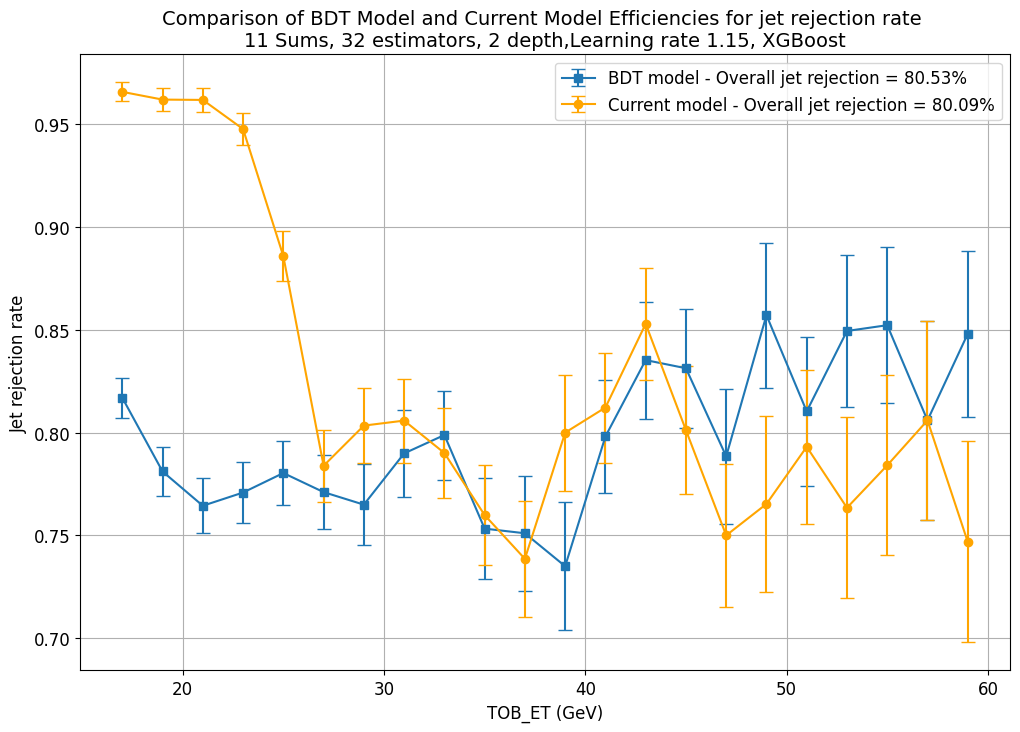

In [29]:


plt.figure(figsize=(12, 8))


plt.errorbar(accuracy_for_label_0_df_with_error_bdt['Energy Bin Midpoint'], 
             accuracy_for_label_0_df_with_error_bdt['Accuracy for Label 0'], 
             yerr=accuracy_for_label_0_df_with_error_bdt['Error'], fmt='-s', 
             capsize=5, label='BDT model - Overall jet rejection = 80.53%')

plt.errorbar(accuracy_for_label_0_df_with_error['Energy Bin Midpoint'], 
             accuracy_for_label_0_df_with_error['Accuracy for Label 0'], 
             yerr=accuracy_for_label_0_df_with_error['Error'], fmt='-o', 
             capsize=5, label='Current model - Overall jet rejection = 80.09%', color='orange')




plt.xlabel('TOB_ET (GeV)', fontsize=12)
plt.ylabel('Jet rejection rate', fontsize=12)
plt.title('Comparison of BDT Model and Current Model Efficiencies for jet rejection rate \n'
          '11 Sums, 32 estimators, 2 depth,'
          'Learning rate 1.15, XGBoost' , fontsize=14)
plt.grid(True)
plt.legend( fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


In [30]:
# Given accuracies and their uncertainties
accuracy_1 = 97.56 # in percent
error_1 = 0.15 # in percent

accuracy_2 = 98.79  # in percent
error_2 = 0.11  # in percent

# Calculate the difference in accuracies
difference = abs(accuracy_1 - accuracy_2)

# Assuming the errors are standard errors, the standard deviation of the difference
# is the square root of the sum of squares of the individual standard errors
std_dev_difference = np.sqrt(error_1**2 + error_2**2)

# Calculate the 'sigma' value of the difference
sigma_difference = difference / std_dev_difference

# The result is significant if it's greater than 3-sigma
three_sigma = 5 * std_dev_difference
significance = sigma_difference > 5

difference, std_dev_difference, sigma_difference, three_sigma, significance


(1.230000000000004,
 0.18601075237738274,
 6.612520966016807,
 0.9300537618869137,
 True)